# 7.**WRITE A PROGRAM TO COMPARE THE PERFORMANCE OF SGD, ADAM, AND RMS PROP OPTIMIZERS ON A GIVEN DATASET.**

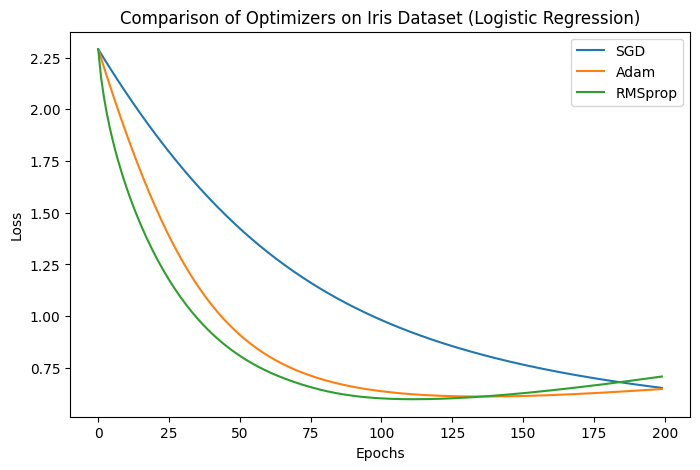

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Labels

# One-hot encode the target labels
# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
np.random.seed(42)
w_sgd = np.random.randn(X.shape[1], y.shape[1])
b_sgd = np.zeros((1, y.shape[1]))
w_adam = w_sgd.copy()
b_adam = b_sgd.copy()
w_rmsprop = w_sgd.copy()
b_rmsprop = b_sgd.copy()

# Hyperparameters
lr = 0.01
epochs = 200
momentum_adam = np.zeros_like(w_adam)
v_adam = np.zeros_like(w_adam)
v_rmsprop = np.zeros_like(w_rmsprop)
beta1, beta2 = 0.9, 0.999  # Adam parameters
eps = 1e-8

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

loss_sgd, loss_adam, loss_rmsprop = [], [], []

# Training loop
for epoch in range(epochs):
    # Forward pass
    logits_sgd = X_train @ w_sgd + b_sgd
    logits_adam = X_train @ w_adam + b_adam
    logits_rmsprop = X_train @ w_rmsprop + b_rmsprop

    y_pred_sgd = softmax(logits_sgd)
    y_pred_adam = softmax(logits_adam)
    y_pred_rmsprop = softmax(logits_rmsprop)

    # Compute loss
    loss_sgd.append(cross_entropy(y_train, y_pred_sgd))
    loss_adam.append(cross_entropy(y_train, y_pred_adam))
    loss_rmsprop.append(cross_entropy(y_train, y_pred_rmsprop))

    # Compute gradients
    dW = X_train.T @ (y_pred_sgd - y_train) / X_train.shape[0]
    db = np.mean(y_pred_sgd - y_train, axis=0, keepdims=True)

    # SGD Update
    w_sgd -= lr * dW
    b_sgd -= lr * db

    # Adam Update
    momentum_adam = beta1 * momentum_adam + (1 - beta1) * dW
    v_adam = beta2 * v_adam + (1 - beta2) * (dW ** 2)
    m_hat = momentum_adam / (1 - beta1 ** (epoch + 1))
    v_hat = v_adam / (1 - beta2 ** (epoch + 1))
    w_adam -= lr * m_hat / (np.sqrt(v_hat) + eps)
    b_adam -= lr * db

    # RMSprop Update
    v_rmsprop = 0.9 * v_rmsprop + 0.1 * (dW ** 2)
    w_rmsprop -= lr * dW / (np.sqrt(v_rmsprop) + eps)
    b_rmsprop -= lr * db

# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(loss_sgd, label='SGD')
plt.plot(loss_adam, label='Adam')
plt.plot(loss_rmsprop, label='RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparison of Optimizers on Iris Dataset (Logistic Regression)')
plt.show()

# **8.IMPLEMENT A NEURAL NETWORK FOR BINARY CLASSIFICATION AND TEST DIFFERENT ACTIVATION FUNCTIONS LIKE ReLU, SIGMOID AND Tanh.**

In [ ]:


    def backward(self, X, y):
        m = X.shape[0]
        dZ2 = self.A2 - yimport numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic binary classification dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # Convert labels into column vector

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Neural Network Model
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, activation='sigmoid', lr=0.01): # Changed _init_ to __init__
        np.random.seed(42)
        self.lr = lr
        self.activation_name = activation
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros((1, 1))

        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Activation function must be 'sigmoid', 'tanh', or 'relu'")

    # ... (rest of the class code remains the same)

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.activation(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)  # Output layer uses sigmoid (for binary classification)
        return self.A2
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.activation_derivative(self.A1)
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

    def train(self, X, y, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)
            self.backward(X, y)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

        return loss_history

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Train models with different activation functions
activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for act in activations:
    print(f"\nTraining Neural Network with {act} activation:")
    nn = NeuralNetwork(input_size=2, hidden_size=5, activation=act, lr=0.1)
    histories[act] = nn.train(X_train, y_train, epochs=1000)

    # Evaluate accuracy
    y_pred_test = nn.predict(X_test)
    accuracy = np.mean(y_pred_test == y_test) * 100
    print(f"Test Accuracy ({act}): {accuracy:.2f}%")

# Plot loss curves
plt.figure(figsize=(8, 5))
for act in activations:
    plt.plot(histories[act], label=f'{act}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for Different Activation Functions')
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-3116dfdd4c80>, line 3)

# **9.IMPLEMENT A NEURAL NETWORK TO SOLVE A MULTI-CLASS CLASSIFICATION PROBLEM AND EVALUATE DIFFERENT WEIGHT INITIALIZATION TECHNIQUES.**


Training Neural Network with random initialization:
Epoch 0: Loss = 1.1062
Epoch 100: Loss = 0.4047
Epoch 200: Loss = 0.2241
Epoch 300: Loss = 0.1403
Epoch 400: Loss = 0.1013
Test Accuracy (random): 100.00%

Training Neural Network with xavier initialization:
Epoch 0: Loss = 1.2791
Epoch 100: Loss = 0.2855
Epoch 200: Loss = 0.1758
Epoch 300: Loss = 0.1172
Epoch 400: Loss = 0.0893
Test Accuracy (xavier): 100.00%

Training Neural Network with he initialization:
Epoch 0: Loss = 1.5355
Epoch 100: Loss = 0.2735
Epoch 200: Loss = 0.1685
Epoch 300: Loss = 0.1153
Epoch 400: Loss = 0.0919
Test Accuracy (he): 100.00%


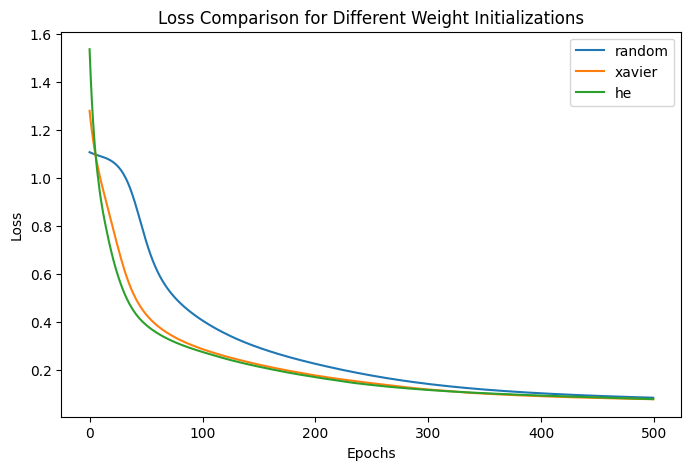

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
X = data.data  # Features (4-dimensional)
y = data.target.reshape(-1, 1)  # Labels (0, 1, 2)

# One-hot encode labels (multi-class classification)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define activation functions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Weight initialization techniques
def initialize_weights(input_size, hidden_size, output_size, method='random'):
    if method == 'random':  # Standard Random Initialization
        W1 = np.random.randn(input_size, hidden_size) * 0.1
        W2 = np.random.randn(hidden_size, output_size) * 0.1
    elif method == 'xavier':  # Xavier/Glorot Initialization
        W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
        W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)
    elif method == 'he':  # He Initialization (for ReLU)
        W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
    else:
        raise ValueError("Initialization method must be 'random', 'xavier', or 'he'.")

    b1 = np.zeros((1, hidden_size))
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Neural Network Model
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, initialization='random', lr=0.01): # Corrected the constructor name to __init__
        np.random.seed(42)
        self.lr = lr
        self.W1, self.b1, self.W2, self.b2 = initialize_weights(input_size, hidden_size, output_size, initialization)

    # ... (rest of the class code remains the same)

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = relu(self.Z1)  # Hidden layer activation (ReLU)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = softmax(self.Z2)  # Output layer activation (Softmax)
        return self.A2

    def backward(self, X, y):
        m = X.shape[0]

        # Compute gradients
        dZ2 = self.A2 - y
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * relu_derivative(self.Z1)  # Backprop through ReLU
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update parameters
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

    def train(self, X, y, epochs=500):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)
            self.backward(X, y)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

        return loss_history

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

# Train models with different weight initialization techniques
initializations = ['random', 'xavier', 'he']
histories = {}

for init in initializations:
    print(f"\nTraining Neural Network with {init} initialization:")
    nn = NeuralNetwork(input_size=4, hidden_size=8, output_size=3, initialization=init, lr=0.1)
    histories[init] = nn.train(X_train, y_train, epochs=500)

    # Evaluate accuracy
    y_pred_test = nn.predict(X_test)
    y_true_test = np.argmax(y_test, axis=1)
    accuracy = np.mean(y_pred_test == y_true_test) * 100
    print(f"Test Accuracy ({init}): {accuracy:.2f}%")

# Plot loss curves for different initializations
plt.figure(figsize=(8, 5))
for init in initializations:
    plt.plot(histories[init], label=f'{init}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison for Different Weight Initializations')
plt.show()


# **10.WRITE A PROGRAM TO GENERATE CONFUSION MATRIXES FOR DIFFERENT MODELS AND ANALYZE THEIR PERFORMANCE**.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


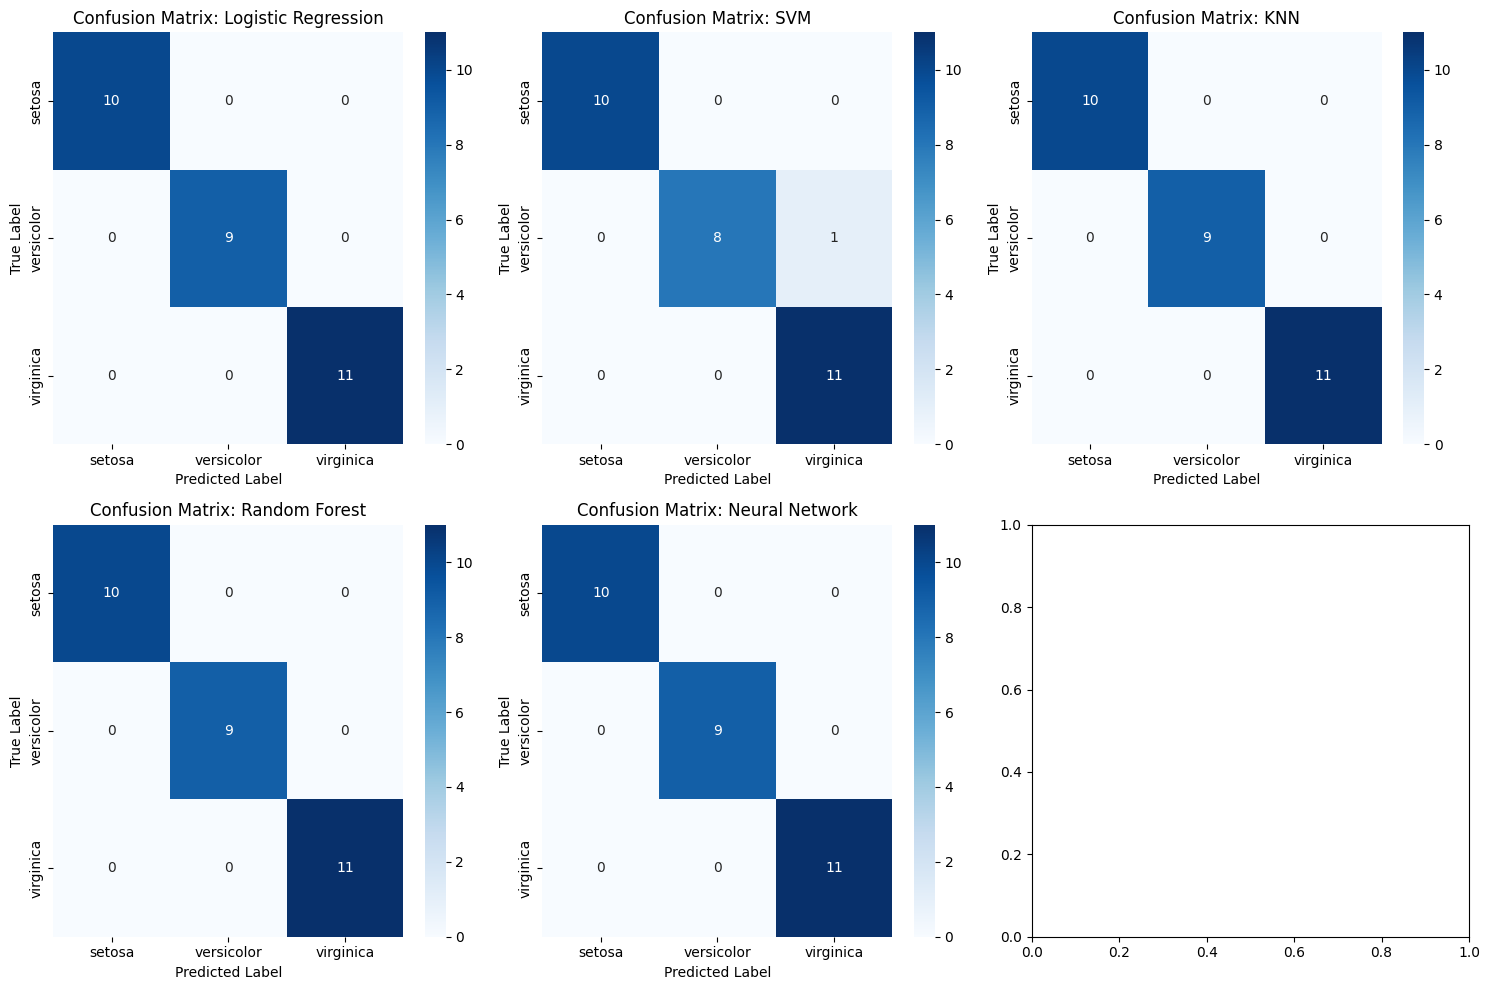


🔹 Classification Report: Logistic Regression 🔹
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔹 Classification Report: SVM 🔹
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


🔹 Classification Report: KNN 🔹
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Load the Iris dataset
data = load_iris()
X = data.data  # Features (4-dimensional)
y = data.target  # Labels (0, 1, 2)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
}

# Train models and generate confusion matrices
conf_matrices = {}
classification_reports = {}
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # Compute classification report
    classification_reports[name] = classification_report(y_test, y_pred, target_names=data.target_names)

    # Compute accuracy
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix: {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Print classification reports
for name, report in classification_reports.items():
    print(f"\n🔹 Classification Report: {name} 🔹")
    print(report)

# Print model accuracies
print("\n🔹 Model Accuracies 🔹")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.2%}")